# Preparing Data

In [27]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [28]:
x,y, = mnist["data"], mnist["target"]

In [29]:
import numpy as np
x = np.array(x)
y = np.array(y)

In [30]:
x.shape

(70000, 784)

In [31]:
y.shape

(70000,)

In [32]:
%matplotlib inline

# Preview and Predict

In [33]:
import matplotlib
import matplotlib.pyplot as plt

(-0.5, 27.5, 27.5, -0.5)

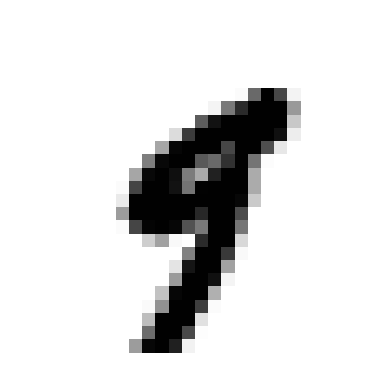

In [34]:
some_digit = x[36000]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")

In [35]:
print("Predicted value: ")
y[36000]

Predicted value: 


'9'

(-0.5, 27.5, 27.5, -0.5)

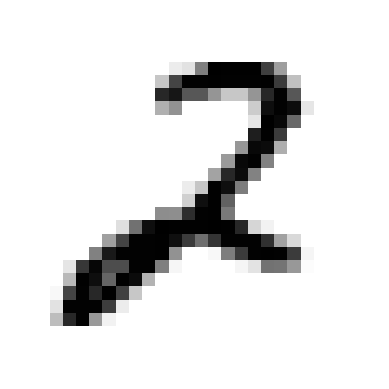

In [36]:
some_digit = x[36001]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")

In [37]:
print("Predicted value: ")
y[36001]

Predicted value: 


'2'

In [38]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

In [39]:
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

Creating a Secondary Detector

In [40]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)

In [41]:
y_train

array([6, 9, 4, ..., 2, 4, 2], dtype=int8)

# Building a Model

In [42]:
from sklearn.linear_model import SGDClassifier

In [43]:
sdg = SGDClassifier(random_state=42)

In [44]:
sdg.fit(x_train, y_train_2)

SGDClassifier(random_state=42)

In [45]:
sdg.predict([some_digit])

array([ True])

In [46]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(sdg, x_train, y_train_2, cv=3, scoring="accuracy")

In [47]:
a.mean()

0.9723